# **Hierarchical Clustering**

These algorithms have clusters sorted in an order based on the hierarchy in data similarity observations. Hierarchical clustering is categorised into two types, divisive(top-down) clustering and agglomerative (bottom-up) clustering. The former type groups all data points/observations in a single cluster and divides it into two clusters on least similarity between them, while the latter type assigns every data point as a cluster itself and aggregates the most similar clusters. This basically means bringing the right data together.

Most of the hierarchical algorithms such as [single linkage, complete linkage](https://nlp.stanford.edu/IR-book/html/htmledition/single-link-and-complete-link-clustering-1.html), [median linkage, Ward’s method](https://arxiv.org/pdf/1109.2378.pdf), among others, follow the agglomerative approach. (More information on hierarchical clustering can be found [here](https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-clustering-1.html)).

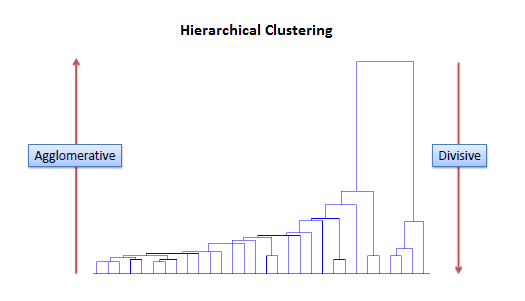

## **Agglomerative:**

This is a “bottom-up” strategy where every observation starts in its personal cluster, and pairs of clusters are united as one moves up the hierarchy.

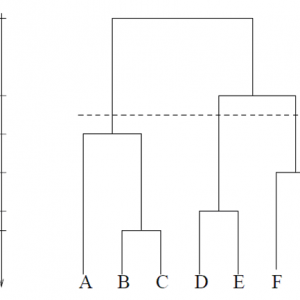

## **Divisive:**


This is a “top-down” procedure where all observations start in one cluster, and divisions are implemented recursively as one moves down the hierarchy.

## **Comparison between these two clustering techniques: K-Means and Hierarchical clustering.**

### **The Problem Statement**

Imagine a mall which has recorded the details of 200 of its customers through a membership campaign. Now, it has information about customers, including their gender, age, annual income and a spending score. This spending score is given to customers based on their past spending habits from purchases they made from the mall.


Now, suppose the mall is launching a luxurious product and wants to reach out to potential customers who can buy it. Approaching every customer will take a lot of time and will be an expensive exercise. Hence, using the information on customers, the mall may want to segregate customers who have the potential to buy a luxurious product. This problem can be addressed through clustering, where we can place customers into different segments and identify potential customers.


We can represent the customer on a two-dimensional Euclidean space where X-axis will represent the annual income of customers, and Y-axis will represent the spending score of customers. After representing each of the customers on this plane, using a clustering technique, we can form the groups of customers. Now, on the basis of their income and spending score, we can identify the group of customers who have the potential to buy a luxurious product. 

### **Customer Segmentation Using K-Means & Hierarchical Clustering**

Now, we are going to implement the K-Means clustering technique in segmenting the customers as discussed in the above section. The dataset is open-sourced and is available at Kaggle. Follow the steps below:

####**Import the basic libraries to read the CSV file**

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels scikit-image --user -q

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#### **Load the dataset**

Read the dataset that is in a CSV file. Define the dataset for the model

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

#### **Apply K-Means Algorithm with Elbow Method.**

In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS). For more details, refer to our previous notebooks.

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the elbow on the X-axis. In the above plot, the elbow seems to be on point 5 of X-axis. So, the optimal number of clusters will be 5 for the K-Means algorithm.

####**Fit the K-Means Algorithm**

After finding the optimal number of clusters, fit the K-Means clustering model to the dataset defined in the second step and then predict clusters for each of the data elements. It means it will predict which of the 5 clusters the data item will belong to.

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

####**Visualize the results of K-Means**

When the algorithm predicts a cluster for each of the data items, we need to visualize the result through the plot. For better representation, we need to give each of the clusters a unique colour and name.

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

The name of clusters is given based on their income and spending. For example, when referring to a customer with low income and high spending, we have used cyan colour. This group indicates ‘Careless Customer’ since despite having a low income, they spend more. To sell a luxurious product, a person with high income and high spending habits should be targeted. This group of customers is represented in magenta colour in the above diagram.

####**Apply Hierarchical Clustering on the Same Dataset**

Now the same task will be implemented using Hierarchical clustering. The reading of CSV files and creating a dataset for algorithms will be common as given in the first and second step. In K-Means, the number of optimal clusters was found using the elbow method. In hierarchical clustering, the dendrograms are used for this purpose. The below lines of code plot a dendrogram for our dataset.

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

If you are aware of this method, you can see in the above diagrams. The combination of 5 lines are not joined on the Y-axis from 100 to 240, for about 140 units. So, the optimal number of clusters will be 5 for hierarchical clustering.

####**Fit the Hierarchical Algorithm**

Now we train the hierarchical clustering algorithm and predict the cluster for each data point.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

####**Visualize the Results of Hierarchical Algorithm**

In [ ]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We can see in the above diagram that clustering of customers is almost similar to what was done by K-Means clustering. Only the colour combinations have been changed for differentiating both the diagrams. 


As we have seen in the above section, the results of both the clustering are almost similar to the same dataset. It may be possible that when we have a very large dataset, the shape of clusters may differ a little. However, along with many similarities, these two techniques have some differences also. The below table shows the comparison between K-Means and Hierarchical clustering algorithms based on our implementations.

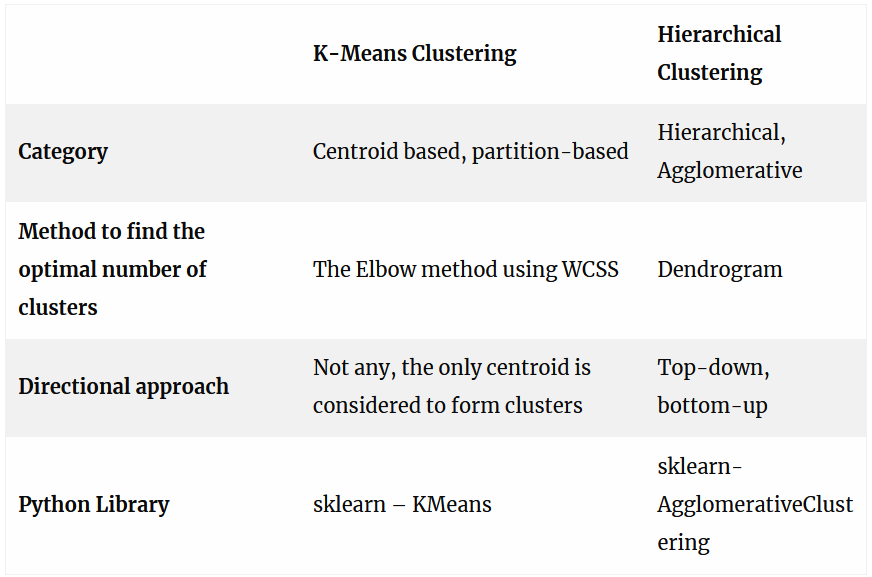

# **Related Articles:**

> * [Comparison Of K-Means & Hierarchical Clustering In Customer Segmentation](https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/)

> * [Most Popular Clustering Algorithms](https://analyticsindiamag.com/most-popular-clustering-algorithms-used-in-machine-learning/)

> * [Comprehensive Guide to CLARANS](https://analyticsindiamag.com/comprehensive-guide-to-clarans-clustering-algorithm/)

> * [Comprehensive Guide to K-Medoids](https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/)

> * [Clustering Algorithm every Data Science Practitioner should know](https://analyticsindiamag.com/clustering-techniques-every-data-science-beginner-should-swear-by/)

> * [Beginner Guide to K-Means](https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)

> * [Is K-Means is the best algorithm?](https://analyticsindiamag.com/is-k-means-clustering-really-the-best-unsupervised-learning-algorithm/)